In [1]:
import numpy as np
import os

from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator
import qiskit_aer.noise as noise

from utils.pce_vs_zne_utils import *

from qiskit import *

from utils.pauli_checks import convert_to_PCS_circ # new util

from mitiq import zne

from utils.pce_vs_zne_utils import *

from qiskit_ibm_runtime.fake_provider import *
from qiskit_aer import AerSimulator

np.set_printoptions(precision=6, edgeitems=10, linewidth=150, suppress=True)

In [2]:
# Custom nosie model
prob_1 = 0.01 # 0.0005
prob_2 = 0 # 0.005

error_1 = noise.depolarizing_error(prob_1, 1)
error_2 = noise.depolarizing_error(prob_2, 2)

noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3', 'sx', 'x'])
# noise_model.add_all_qubit_quantum_error(error_1, ['x'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx'])

backend = AerSimulator(noise_model=noise_model, method="stabilizer")

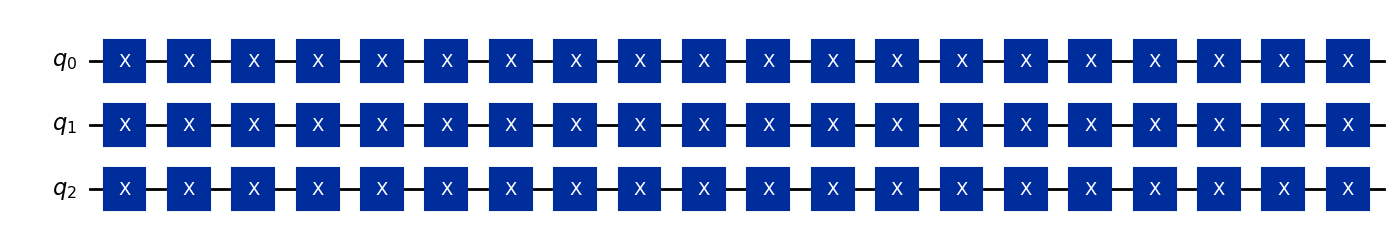

In [3]:
num_qubits = 3

p = 20
qc = QuantumCircuit(num_qubits)
for _ in range(p):
    for i in range(num_qubits):
        qc.x(i)

qc.draw("mpl", fold=-1)

In [4]:
only_Z_checks = True

num_checks = 3

pcs_circs = []
signs_list = []
for cid in range(1, num_checks + 1):
    sign, pcs = convert_to_PCS_circ(
        qc, num_qubits, cid,
        only_Z_checks=only_Z_checks,
        barriers=True
    )
    pcs_circs.append(pcs)
    signs_list.append(sign)

print(signs_list)

[['+1'], ['+1', '+1'], ['+1', '+1', '+1']]


In [5]:
for circ in pcs_circs:
    print(circ)

              ░ ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐»
q_0: ──────■──░─┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├»
           │  ░ ├───┤├───┤├───┤├───┤├───┤├───┤├───┤├───┤├───┤├───┤├───┤├───┤»
q_1: ──────┼──░─┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├»
           │  ░ ├───┤├───┤├───┤├───┤├───┤├───┤├───┤├───┤├───┤├───┤├───┤├───┤»
q_2: ──────┼──░─┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├»
     ┌───┐ │  ░ └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
q_3: ┤ H ├─■──░─────────────────────────────────────────────────────────────»
     └───┘    ░                                                             »
«     ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐ ░         
«q_0: ┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├─░──■──────
«     ├───┤├───┤├───┤├───┤├───┤├───┤├───┤├───┤ ░  │      
«q_1: ┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├─░──┼──────
«     ├───┤├───┤├───┤├───┤├───┤├───┤├───┤├───┤ ░  │      
«q_2: ┤ 

In [6]:
shots_per_check = 50
pauli_string = 'Z'*num_qubits

expectation_values = []
for i in range(num_checks):
    ev = ibmq_executor_pcs(
            pcs_circs[i],
            backend=backend,
            pauli_string=pauli_string,
            num_qubits=num_qubits,
            shots=shots_per_check,
            signs=signs_list[i]
        )
    expectation_values.append(ev)
    
for expectation in expectation_values:
    print(expectation)

>>> Circuit ops (ISA): OrderedDict({'x': 60, 'rz': 12, 'sx': 6, 'measure': 4, 'barrier': 3, 'cx': 2})
unmitigated counts:  {'0000': 32, '1001': 7, '0100': 3, '1101': 1, '1000': 3, '0010': 3, '0110': 1}
signs list =  ['+1']
curr sign =  +1
error found in:  1001
error free =  0
ancialla output =  1
error found in:  1101
error free =  0
ancialla output =  1
error found in:  1000
error free =  0
ancialla output =  1
filtered counts:  {'000': 32, '100': 3, '010': 3, '110': 1}
post selection rate:  0.78
number of filtered counts:  39
>>> Circuit ops (ISA): OrderedDict({'x': 60, 'rz': 24, 'sx': 12, 'barrier': 5, 'measure': 5, 'cx': 4})
unmitigated counts:  {'00000': 31, '01001': 4, '01000': 1, '10010': 5, '10110': 1, '00100': 5, '00001': 2, '00010': 1}
signs list =  ['+1', '+1']
curr sign =  +1
curr sign =  +1
error found in:  01001
error free =  00
ancialla output =  01
error found in:  01000
error free =  00
ancialla output =  01
error found in:  10010
error free =  00
ancialla output =  10

In [7]:
ideal_expectation = get_ideal_expectation(qc, pauli_string)
print(ideal_expectation)

(1+0j)


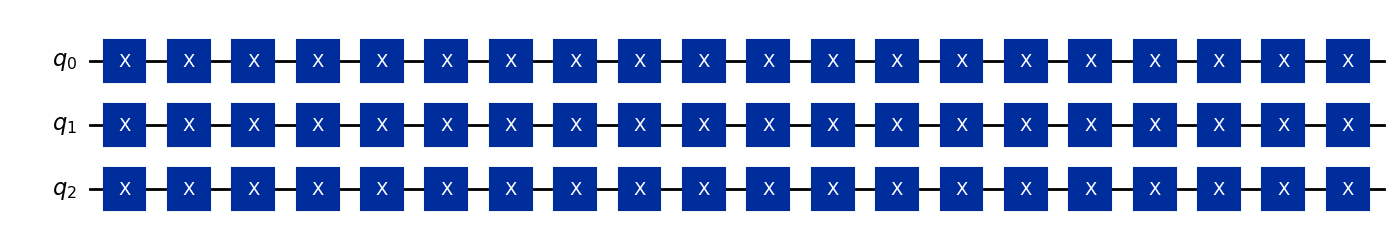

In [8]:
qc.draw("mpl", fold=-1)

In [9]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import SamplerV2 as Sampler


ideal_sim = AerSimulator(method='statevector')

measurement_circuit = qc.copy()
apply_measurement_basis(measurement_circuit, pauli_string)
measurement_circuit.measure_all()

sampler = Sampler(mode=ideal_sim)
job = sampler.run([measurement_circuit], shots=50_000)
results = job.result()
counts = results[0].data.meas.get_counts()
raw_exp = compute_expectation_value(
    counts,
    pauli_string
)
print("ideal (no‐noise) expectation:", raw_exp)


ideal (no‐noise) expectation: 1.0


>>> Circuit ops (ISA): OrderedDict({'x': 60, 'rz': 36, 'sx': 18, 'barrier': 7, 'cx': 6, 'measure': 6})
unmitigated counts:  {'000000': 27, '010010': 9, '100100': 6, '110110': 1, '101101': 1, '001000': 2, '000001': 1, '001001': 3}
signs list =  ['+1', '+1', '+1']
curr sign =  +1
curr sign =  +1
curr sign =  +1
error found in:  010010
error free =  000
ancialla output =  010
error found in:  100100
error free =  000
ancialla output =  100
error found in:  110110
error free =  000
ancialla output =  110
error found in:  101101
error free =  000
ancialla output =  101
error found in:  001000
error free =  000
ancialla output =  001
error found in:  001001
error free =  000
ancialla output =  001
filtered counts:  {'000': 27, '001': 1}
post selection rate:  0.56
number of filtered counts:  28
>>> Circuit ops (ISA): OrderedDict({'x': 60, 'rz': 36, 'sx': 18, 'barrier': 7, 'cx': 6, 'measure': 6})
unmitigated counts:  {'000000': 37, '001001': 2, '100100': 4, '010010': 5, '001011': 1, '000100': 

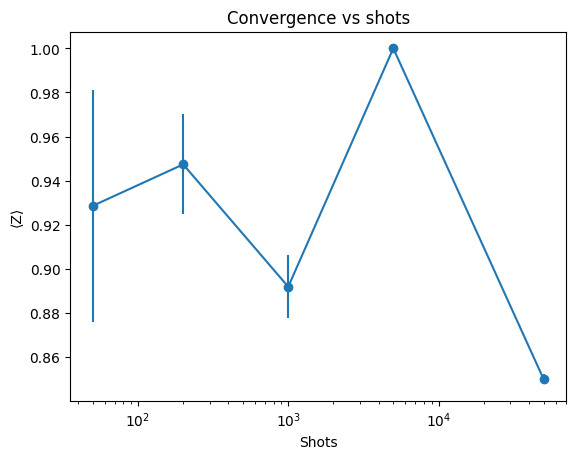

In [15]:
shots_list = [50, 200, 1_000, 5_000, 50_000]
exps = []
cid = 3
for s in shots_list:
    ev = ibmq_executor_pcs(
            pcs_circs[cid-1],
            backend=backend,
            pauli_string=pauli_string,
            num_qubits=num_qubits,
            shots=shots_per_check,
            signs=signs_list[cid-1]
        )
    exps.append(ev)
plt.errorbar(shots_list, exps,
             yerr=[np.sqrt((1 - np.array(exps)**2)/np.array(shots_list))],
             marker='o')
plt.xscale('log')
plt.xlabel("Shots"); plt.ylabel("⟨Z⟩"); plt.title("Convergence vs shots")
plt.show()


In [11]:
# e.g. qc = QuantumCircuit(1); qc.h(0)
# build a single‐check circuit by hand that flips ancilla if outcome should be rejected...
counts = {'00': 25, '01': 25, '10': 0, '11': 0}
print("filtered:", filter_counts(1, ['+1'], counts))
# expect only keys starting with '0' on the check‐bit: {'0':50}


signs list =  ['+1']
curr sign =  +1
error found in:  10
error free =  0
ancialla output =  1
error found in:  11
error free =  0
ancialla output =  1
filtered: {'0': 25, '1': 25}


In [12]:
pcs = pcs_circs[0]
apply_measurement_basis(pcs, pauli_string)
pcs.measure_all()
print(pcs)

sv = AerSimulator(method='statevector')
ideal_pcs = compute_expectation_value(
    backend.run([pcs], shots=50).result().get_counts(),
    pauli_string
)
print(f"ideal PCS circ expectation (no noise): {ideal_pcs}")


                 ░ ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐»
   q_0: ──────■──░─┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├»
              │  ░ ├───┤├───┤├───┤├───┤├───┤├───┤├───┤├───┤├───┤├───┤├───┤├───┤»
   q_1: ──────┼──░─┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├»
              │  ░ ├───┤├───┤├───┤├───┤├───┤├───┤├───┤├───┤├───┤├───┤├───┤├───┤»
   q_2: ──────┼──░─┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├»
        ┌───┐ │  ░ └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
   q_3: ┤ H ├─■──░─────────────────────────────────────────────────────────────»
        └───┘    ░                                                             »
meas: 4/═══════════════════════════════════════════════════════════════════════»
                                                                               »
«        ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐ ░          ░ ┌─┐         
«   q_0: ┤ X ├┤ X ├┤ X ├┤ X ├┤ X 